# Data Analysis with IMDB Movie data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [2]:
df = pd.read_csv('data/IMDB-Movie-Data.csv')
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## Basic Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [4]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


## Data Selection

In [5]:
genre = df['Genre']
genre.head()

0     Action,Adventure,Sci-Fi
1    Adventure,Mystery,Sci-Fi
2             Horror,Thriller
3     Animation,Comedy,Family
4    Action,Adventure,Fantasy
Name: Genre, dtype: object

In [6]:
df[['Rank', 'Year']].iloc[:5, :]

,Rank,Year
0,1,2014
1,2,2012
2,3,2016
3,4,2016
4,5,2016


In [7]:
df[(df['Year'] > 2014) & (df['Rank'] > df['Rank'].quantile(0.95)) & (df['Year'] < 2016)].head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
950,951,Me and Earl and the Dying Girl,"Comedy,Drama","High schooler Greg, who spends most of his tim...",Alfonso Gomez-Rejon,"Thomas Mann, RJ Cyler, Olivia Cooke, Nick Offe...",2015,105,7.8,92076,6.74,74.0
961,962,Into the Forest,"Drama,Sci-Fi,Thriller","After a massive power outage, two sisters lear...",Patricia Rozema,"Ellen Page, Evan Rachel Wood, Max Minghella,Ca...",2015,101,5.9,10220,0.01,59.0
967,968,The Walk,"Adventure,Biography,Crime","In 1974, high-wire artist Philippe Petit recru...",Robert Zemeckis,"Joseph Gordon-Levitt, Charlotte Le Bon,Guillau...",2015,123,7.3,92378,10.14,NaN
968,969,Wrecker,"Action,Horror,Thriller",Best friends Emily and Lesley go on a road tri...,Micheal Bafaro,"Anna Hutchison, Andrea Whitburn, Jennifer Koen...",2015,83,3.5,1210,NaN,37.0
976,977,Dark Places,"Drama,Mystery,Thriller",Libby Day was only eight years old when her fa...,Gilles Paquet-Brenner,"Charlize Theron, Nicholas Hoult, Christina Hen...",2015,113,6.2,31634,NaN,39.0


## Groupby

In [8]:
df.groupby('Director')[['Rating']].mean().head()

,Rating
Director,
Aamir Khan,8.5
Abdellatif Kechiche,7.8
Adam Leon,6.5
Adam McKay,7.0
Adam Shankman,6.3


In [9]:
df.groupby('Director')[['Rating']].mean().sort_values(['Rating'], ascending=True).head()

,Rating
Director,
Jason Friedberg,1.9
James Wong,2.7
Shawn Burkett,2.7
Jonathan Holbrook,3.2
Femi Oyeniran,3.5


## View Missing Values

In [10]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [11]:
df.drop('Metascore', axis=1).head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions)
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02


## Apply

In [12]:
def rating_group(rating):
    if rating > 7.5:
        return 'Good'
    elif rating > 6.0:
        return 'Average'
    return 'Bad'


df['Rating_Category'] = df['Rating'].apply(rating_group)
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_Category
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Good
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Average
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Average
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Average
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Average


# Data Analysis with Time Series data

In [20]:
ops_df = pd.read_csv('data/opsd_germany_daily.csv')
ops_df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


## Set index

In [21]:
ops_df = ops_df.set_index(['Date'])
ops_df.index = pd.to_datetime(ops_df.index)

In [22]:
ops_df.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [25]:
ops_df['Year'] = ops_df.index.year
ops_df['Month'] = ops_df.index.month
ops_df['Weekday Name'] = ops_df.index.day_name()
ops_df.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday


In [26]:
ops_df.loc['2014-01-20': '2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


## Visualizing

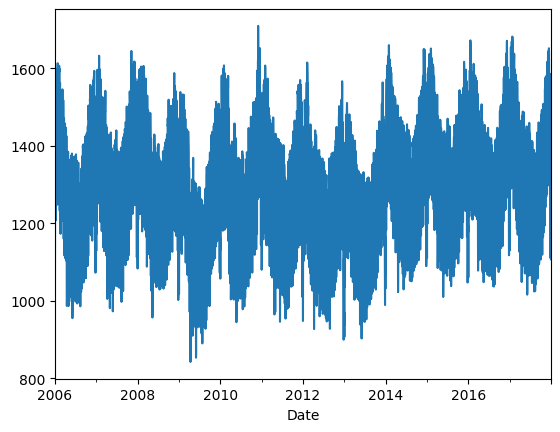

In [32]:
ops_df['Consumption'].plot();

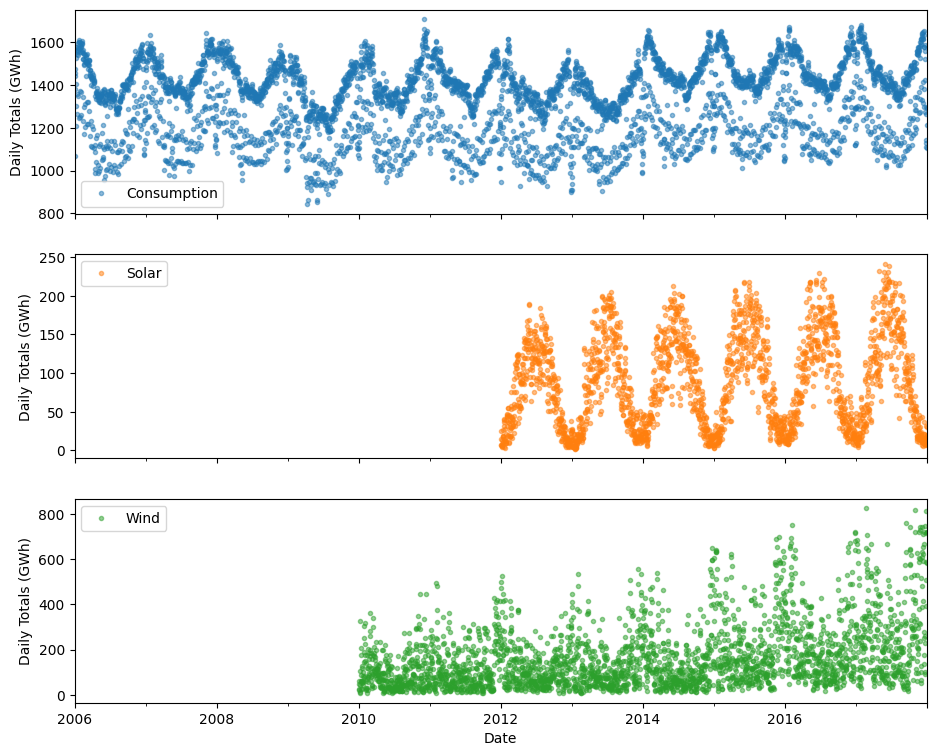

In [36]:
axes = ops_df[['Consumption', 'Solar', 'Wind']].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')
plt.show()

## Seasornality

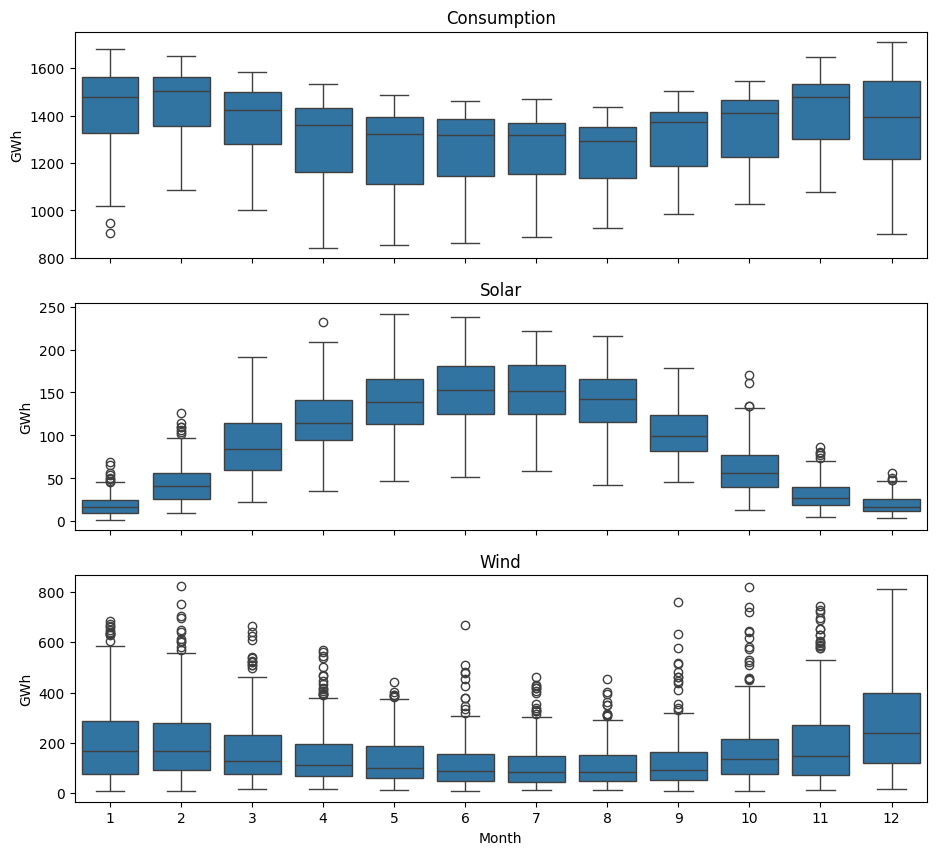

In [37]:
fig, axes = plt.subplots(3, 1, figsize=(11,10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=ops_df, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

## Frequencies

In [38]:
pd.date_range('1988-03-10', '1988-03-15', freq='D')

DatetimeIndex(['1988-03-10', '1988-03-11', '1988-03-12', '1988-03-13',
               '1988-03-14', '1988-03-15'],
              dtype='datetime64[ns]', freq='D')

In [39]:
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
consum_sample = ops_df.loc[times_sample, ['Consumption']].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [40]:
consum_freq = consum_sample.asfreq('D')
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


## Resampling

In [48]:
# Resample to weekly frequency, aggreating with mean
data_columns = ['Consumption', 'Solar', 'Wind', 'Wind+Solar']
ops_df_mean = ops_df[data_columns].resample('W').mean()
ops_df_mean.head()

,Consumption,Solar,Wind,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


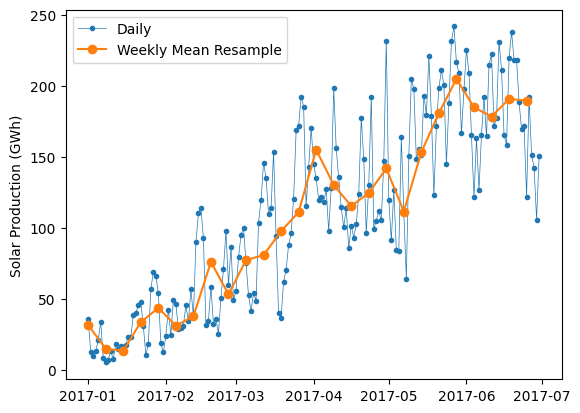

In [46]:
start, end = '2017-01', '2017-06'
fig, ax = plt.subplots()
ax.plot(ops_df.loc[start:end, 'Solar'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(ops_df_mean.loc[start:end, 'Solar'], marker='o', linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend()
plt.show()

In [49]:
ops_annual = ops_df[data_columns].resample('YE').sum(min_count=360)
ops_annual = ops_annual.set_index(ops_annual.index.year)
ops_annual.index.name = 'Year'
ops_annual['Wind+Solar/Consumption'] = ops_annual['Wind+Solar'] / ops_annual['Consumption']
ops_annual.tail(3)

,Consumption,Solar,Wind,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2015,505264.56300,34907.138,77468.994,112376.132,0.222410
2016,505927.35400,34562.824,77008.126,111570.950,0.220528
2017,504736.36939,35882.643,102667.365,138550.008,0.274500


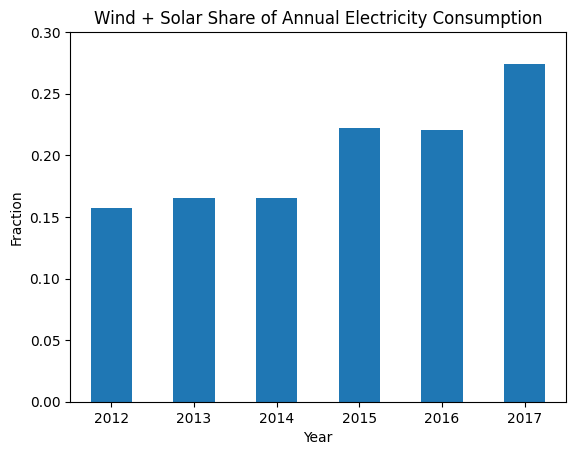

In [53]:
ax = ops_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0)
plt.show()

## Rollling windows

In [54]:
ops_7d = ops_df[data_columns].rolling(7, center=True).mean()
ops_7d.head()

,Consumption,Solar,Wind,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN


## Trends

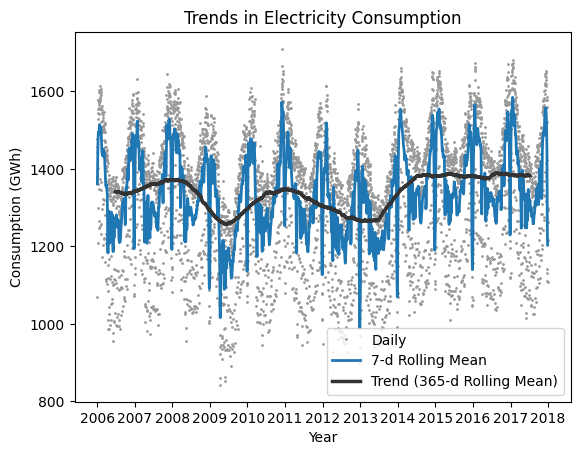

In [57]:
import matplotlib.dates as mdates

ops_365 = ops_df[data_columns].rolling(window=365, center=True, min_periods=360).mean()

fig, ax = plt.subplots()
ax.plot(ops_df['Consumption'], marker='.', markersize=2, color='0.6', linestyle='None', label='Daily')
ax.plot(ops_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')
ax.plot(ops_365['Consumption'], color='0.2', linewidth=2.5, label='Trend (365-d Rolling Mean)')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')
plt.show()

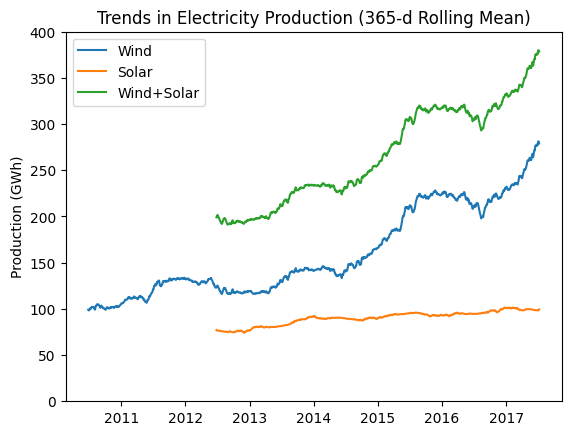

In [58]:
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(ops_365[nm], label=nm)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Mean)')
plt.show()